# Springboard Capstone Project Data Wrangling 

To clean the data we must first check to see what the distribution of the data is across MBTI category types. Our next step will be to split each 'posts' entry up into individual entries categorized by MBTI type.

## 1. Visualization
First lets open up the csv file mbti_1.csv and take a peek at the first few entries.

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re

#read in csv as dataframe
data = pd.read_csv('mbti_1.csv')
mbti_df = pd.DataFrame(data)
print(mbti_df.head(10), mbti_df.shape)

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||... (8675, 2)


We have a total of 8675 entires. As you can see we have some information that is useful and some that is not..Next let's check the total entries for each each personality catergory and then double check to make sure all 16 are represented and at what ratio.

In [2]:
#check total entries for each personality type
type_count = mbti_df.type.value_counts()
print(type_count)

#check to see if all 16 personalities are represented
type_count.shape

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64


(16,)

So far so good, all 16 MBTI category types are there. It looks like some of our trailing personality types are severely underrepresented to the point where it might affect the effectiveness of a classification model.

Here is the same data, plotted for visual. 

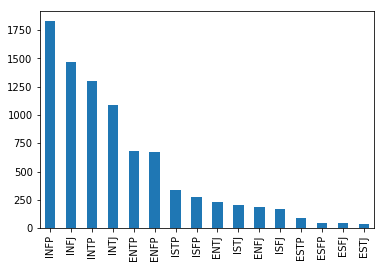

In [3]:
type_count.plot.bar(x='type')
plt.show()

## 2. Entry Combining
The description of the dataset is that each entry in 'posts' column countains multiple comments seperated by '|||' characters. By removing these characters, each entry can become one long string of text. This leaves more than enough features for extraction later.

In [4]:
mbti_df['clean_posts'] = mbti_df['posts'].apply(lambda text: re.sub(r'\|\|\|', r' ', text)) 


## 3. Remove Escaping HTML Characters
Next order of business should be to clean out escaping HTML characters, since this data was presumably collected from the web. escaping HTML characters can muck up code and cause unexpected problems, so let's get rid of them. 

In [5]:
import html

#remove escaping HTML characters and apply it across 'posts' column
mbti_df['clean_posts'] = html.unescape(mbti_df['clean_posts'])

mbti_df.head(50)

,type,posts,clean_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'http://www.youtube.com/watch?v=qsXHcwe3krw ht...
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired. That's another silly misconcept...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,'18/37 @.@ Science is not perfect. No scienti...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...","'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist...","I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,'https://www.youtube.com/watch?v=w8-egj0y8Qs I...


## 4. Remove Contractions
Next I think all the contractions need to be removed. Just like escaping HTML charaters, apostrophies can really cause problems later down the road, so using a dictionary of contractions let's map all contractions to their regular english counterparts.

In [6]:
#here we have a dict of contractions to map to their word counterparts
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"Im" : "I am",
"IM" : "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"im" : "i am",    
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
 #define a function to replace contractions in mbti_df.posts with whole words
def contraction_replace(entry):
    lower = entry.lower()
    words = lower.split()
    reformed = [CONTRACTION_MAP[word] if word in CONTRACTION_MAP else word for word in words]
    return " ".join(reformed)

mbti_df['clean_posts'] = mbti_df['clean_posts'].apply(contraction_replace)

mbti_df.head(10)


,type,posts,clean_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw ht...
1,ENTP,'I'm finding the lack of me in these posts ver...,'i'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,'good one _____ https://www.youtube.com/watch?...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'dear intp, i enjoyed our conversation the oth..."
4,ENTJ,'You're fired.|||That's another silly misconce...,'you're fired. that is another silly misconcep...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,'18/37 @.@ science is not perfect. no scientis...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...","'no, i cannot draw on my own nails (haha). tho..."
7,INTJ,'I tend to build up a collection of things on ...,'i tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist...","i am not sure, that is a good question. the di..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,'https://www.youtube.com/watch?v=w8-egj0y8qs i...


## 5 - 7. Remove Hyperlinks, Digits, and Punctuation
Next lets remove hyperlinks and digits, since neither of those will aid in the text analsis later. Let's also remove punctuation too, simply to disambiguate the text.

In [7]:

#define a function to remove all hyperlinks from data entries
def remove_links(entry):
    return re.sub(r"http\S+", '', entry)

#define a funtion to remove all digits from entries. we dont need them for text analysis
def remove_digits(entry):
    return re.sub('\d', '', entry)

#remove all links and digits in dataframe by applying remove_links and remove_digits
#I wanted to use .agg to apply all these functions simultaneously, but they inteferred with each other to create unwanted results.

mbti_df['clean_posts'] = mbti_df['clean_posts'].apply(remove_links)
mbti_df['clean_posts'] = mbti_df['clean_posts'].apply(remove_digits)



### Create copy of the cleaned data
Make a copy of the entrys but this time remove all references of each personality type. This is to create a copy of the data with the context (and hopefully the bias) of where the original text data came from (personalitycafe).

In [12]:
reg_mbti = 'infj|entp|intp|intj|entj|enfj|infp|enfp|isfp|istp|isfj|istj|estp|esfp|estj|esfj'

mbti_df['no_ref'] = mbti_df.clean_posts.str.replace(reg_mbti, '')

#remove punctation
mbti_df['clean_posts'] = mbti_df['clean_posts'].str.replace('[^\w\s]','')
mbti_df['clean_posts'] = mbti_df['clean_posts'].str.replace("_", " ")
mbti_df['no_ref'] = mbti_df['no_ref'].str.replace('[^\w\s]','')
mbti_df['no_ref'] = mbti_df['no_ref'].str.replace("_", " ")



## 8. Remove Stopwords
Now lets remove all the stop words in the dataframe. Stopwords are words that don't really contribute anything useful to the text analysis so I'll just remove them completely. We'll need to nltk module to do this. It doesn't come  installed in anaconda so use !pip to install the module then nltk.download('popular') to download its popular libraries.

In [9]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/nbuser/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/nbuser/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/nbuser/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/nbuser/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/nbuser/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/nbuser/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package name

True

In [10]:
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

mbti_df['clean_posts'] = mbti_df['clean_posts'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in (stop)]))

mbti_df.head(10)

,type,posts,clean_posts,no_ref
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,enfp intj moments sportscenter top ten plays p...,and moments sportscenter not top ten play...
1,ENTP,'I'm finding the lack of me in these posts ver...,im finding lack posts alarming sex boring posi...,im finding the lack of me in these posts very ...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course say know blessing curse absolu...,good one of course to which i say i kno...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...,dear i enjoyed our conversation the other day...
4,ENTJ,'You're fired.|||That's another silly misconce...,youre fired another silly misconception approa...,youre fired that is another silly misconceptio...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,science perfect scientist claims scientific in...,science is not perfect no scientist claims t...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",cannot draw nails haha done professionals nail...,no i cannot draw on my own nails haha those we...
7,INTJ,'I tend to build up a collection of things on ...,tend build collection things desktop use frequ...,i tend to build up a collection of things on m...
8,INFJ,"I'm not sure, that's a good question. The dist...",sure good question distinction two dependant p...,i am not sure that is a good question the dist...
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,position actually let go person due various re...,i am in this position where i have to actuall...


## Export the Clean Data
Now that the data has been cleaned, export it to directory using ```.to_csv()```

In [11]:
mbti_df.to_csv("mbti_cleaned_unsplit2.csv")